<a href="https://colab.research.google.com/github/Nancy-Shi/Complex_Networks/blob/main/060723_Degree_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NetworkX** is a network analysis package in Python. https://networkx.org/documentation/stable/index.html 


> We will use it to explore how to build an adjacency list for a network and build corresponding functions to calculate network features such as degree distribution.



In [5]:
import networkx as nx

In the following function, **adjacency list** stores the 
neighbors of the nodes. Index list stores the nodes and their starting index of neighbors in the adjacency list. 

In [6]:
def build_adj_list(edges):
    G = nx.Graph()
    G.add_edges_from(edges)

    adjacency_list = {}
    index_list = {}

    for node in G.nodes():
        neighbors = list(G.neighbors(node))
        adjacency_list[node] = neighbors

        # Create index list for each node's neighbors
        index_list[f'K_{node}'] = neighbors

    return adjacency_list, index_list

In [7]:
# Test:
edges = [(1, 2), (1, 3), (1, 4), (2, 3), (3, 5), (3, 4)]
adj_list, index_list = build_adj_list(edges)

print("Adjacency List:")
for node, neighbors in adj_list.items():
    print(f"Node {node}: {neighbors}")

print("\nIndex List:")
for node, neighbors in index_list.items():
    print(f"{node}: {neighbors}")

Adjacency List:
Node 1: [2, 3, 4]
Node 2: [1, 3]
Node 3: [1, 2, 5, 4]
Node 4: [1, 3]
Node 5: [3]

Index List:
K_1: [2, 3, 4]
K_2: [1, 3]
K_3: [1, 2, 5, 4]
K_4: [1, 3]
K_5: [3]


In [8]:
adj_list

{1: [2, 3, 4], 2: [1, 3], 3: [1, 2, 5, 4], 4: [1, 3], 5: [3]}

In [9]:
import networkx as nx

def build_adj_list_2(edges):
    G = nx.Graph()
    G.add_edges_from(edges)

    adjacency_list = {}
    index_list = {}

    index = 0
    for node in G.nodes():
        neighbors = list(G.neighbors(node))
        adjacency_list[node] = neighbors

        # Create index list with the node and its starting position
        index_list[node] = index
        index += len(neighbors)

    return adjacency_list, index_list

def print_adj_list_2(edges):
  adj_list, index_list = build_adj_list_2(edges)

  print("Adjacency List:")
  for node, neighbors in adj_list.items():
    print(f"Node {node}: {neighbors}")

  ("\nIndex List:")
  for node, start_index in index_list.items():
    print(f"{node}: {start_index}")

In [10]:
# Test:
edges = [(1, 2), (1, 3), (1, 4), (2, 3), (3, 5), (3, 4)]
adj_list, index_list = build_adj_list_2(edges)

print("Adjacency List:")
for node, neighbors in adj_list.items():
    print(f"Node {node}: {neighbors}")

print("\nIndex List:")
for node, start_index in index_list.items():
    print(f"{node}: {start_index}")

Adjacency List:
Node 1: [2, 3, 4]
Node 2: [1, 3]
Node 3: [1, 2, 5, 4]
Node 4: [1, 3]
Node 5: [3]

Index List:
1: 0
2: 3
3: 5
4: 9
5: 11


In [11]:
adj_list

{1: [2, 3, 4], 2: [1, 3], 3: [1, 2, 5, 4], 4: [1, 3], 5: [3]}

In [12]:
index_list

{1: 0, 2: 3, 3: 5, 4: 9, 5: 11}

In [13]:
edges2 = [(1,2),(1,3),(1,4),(1,5), (2,3),(3,4),(4,5),(4,6),(6,7),(2,8)]
print_adj_list_2(edges2)

Adjacency List:
Node 1: [2, 3, 4, 5]
Node 2: [1, 3, 8]
Node 3: [1, 2, 4]
Node 4: [1, 3, 5, 6]
Node 5: [1, 4]
Node 6: [4, 7]
Node 7: [6]
Node 8: [2]
1: 0
2: 4
3: 7
4: 10
5: 14
6: 16
7: 18
8: 19


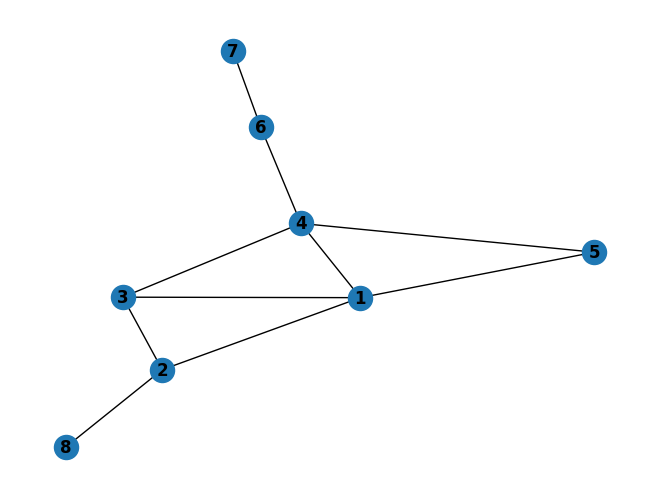

In [14]:
G3 = nx.Graph()
G3.add_edges_from(edges2)
nx.draw(G3, with_labels=True, font_weight='bold')

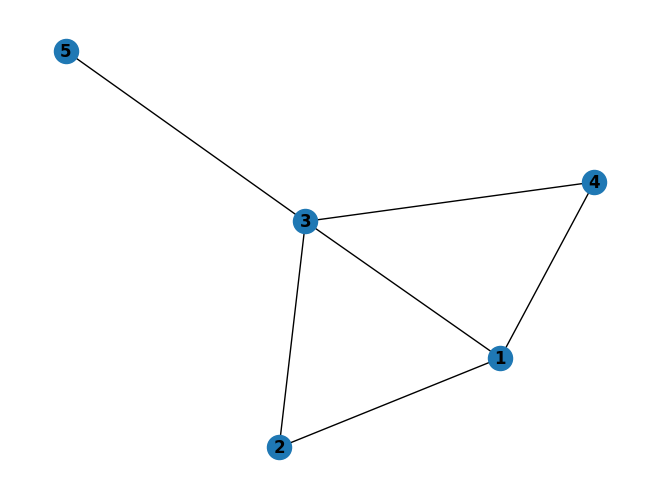

In [15]:
G = nx.Graph()
G.add_edges_from(edges)
nx.draw(G, with_labels=True, font_weight='bold')

The **degree distribution** is the probability that a randomly chosen node has degree k: $$P(k)=\frac{N_k}{N}.$$ $N_k$ denotes the number of nodes with degree $k$, while $N$ represents the size of the network. 

In [16]:
def degree_distribution(adj_list, k):
    N_k = 0
    N = len(adj_list)
    for node, neighbors in adj_list.items():
        if len(neighbors) == k:
            N_k += 1
    return N_k / N

In [17]:
def summarize_degree_dist(edges):
  adj_list, index_list = build_adj_list(edges)

  for k in range(0, len(adj_list)+1):
    deg_dist = degree_distribution(adj_list, k)
    print(f"Degree distribution of P({k}) is {deg_dist}.")

In [18]:
# Test 1:
edges1 = [(1, 2), (1, 3), (1, 4), (2, 3), (3, 5), (3, 4)]

summarize_degree_dist(edges1)

Degree distribution of P(0) is 0.0.
Degree distribution of P(1) is 0.2.
Degree distribution of P(2) is 0.4.
Degree distribution of P(3) is 0.2.
Degree distribution of P(4) is 0.2.
Degree distribution of P(5) is 0.0.


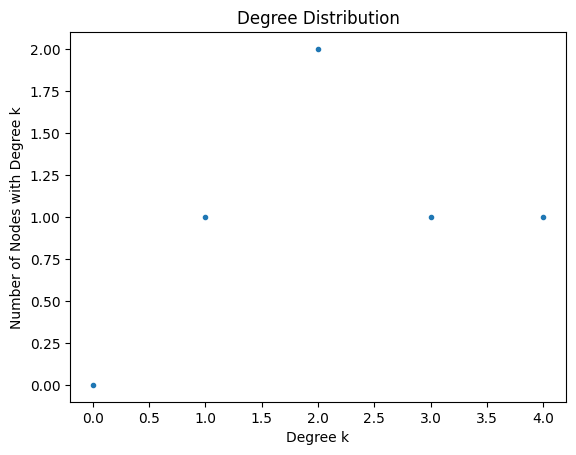

In [19]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

hist1 = nx.degree_histogram(G)
    
plt.plot(range(0, len(hist1)), hist1, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree k")
plt.ylabel("Number of Nodes with Degree k")
#plt.loglog()
plt.show()

In [20]:
summarize_degree_dist(edges2)

Degree distribution of P(0) is 0.0.
Degree distribution of P(1) is 0.25.
Degree distribution of P(2) is 0.25.
Degree distribution of P(3) is 0.25.
Degree distribution of P(4) is 0.25.
Degree distribution of P(5) is 0.0.
Degree distribution of P(6) is 0.0.
Degree distribution of P(7) is 0.0.
Degree distribution of P(8) is 0.0.


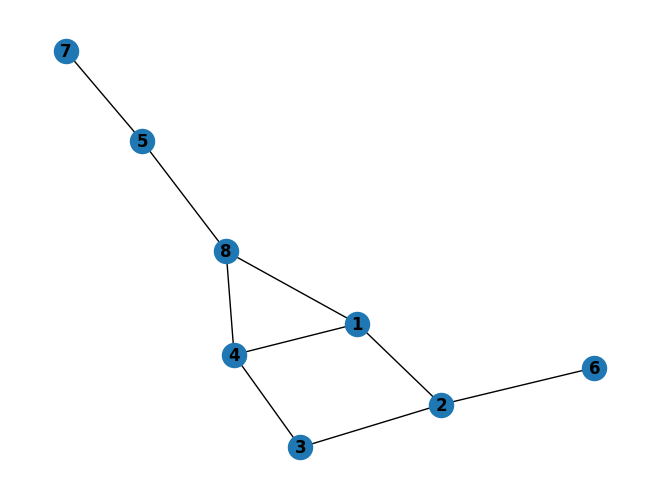

In [21]:
G2 = nx.Graph()
G2.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8])
G2.add_edges_from([(1, 2), (1, 4), (1, 8), (2, 3), (3, 4), (5, 7), (5, 8), (4, 8), (2, 6)])
nx.draw(G2, with_labels=True, font_weight='bold')

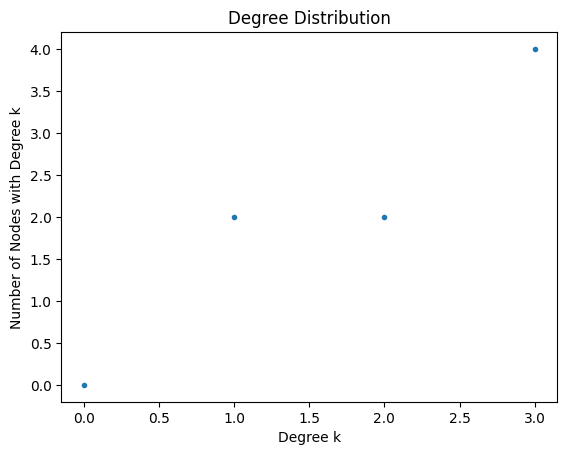

In [22]:
hist2 = nx.degree_histogram(G2)
    
plt.plot(range(0, len(hist2)), hist2, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree k")
plt.ylabel("Number of Nodes with Degree k")
#plt.loglog()
plt.show()

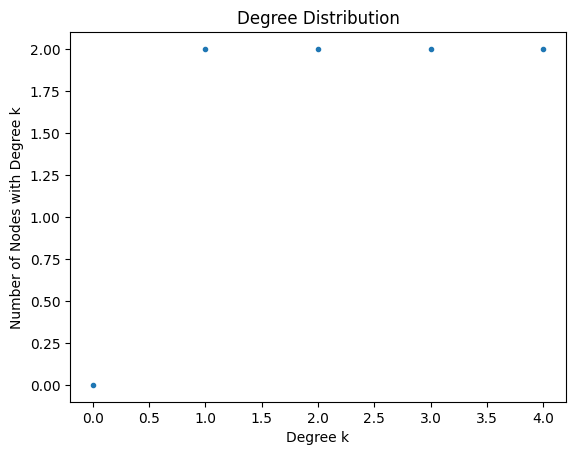

In [23]:
hist3 = nx.degree_histogram(G3)
    
plt.plot(range(0, len(hist3)), hist3, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree k")
plt.ylabel("Number of Nodes with Degree k")
#plt.loglog()
plt.show()

**Path Length** 
Using the built-in algorithm and input, output nodes to compute the shortest path length

Documentation: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.generic.shortest_path_length.html#:~:text=The%20length%20of%20the%20path,to%20flip%20the%20edge%20orientation.

In [24]:
nx.shortest_path_length(G, source=2, target=5, weight=None, method='dijkstra')

2

In [25]:
nx.shortest_path_length(G2, source=7, target=6, weight=None, method='dijkstra')

5

In [26]:
nx.shortest_path_length(G2, source=3, target=5, weight=None, method='dijkstra')

3

**Degree Pearson Correlation** computes degree assortativity of graph.

Documentation: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.assortativity.degree_pearson_correlation_coefficient.html

**Assortativity**
Documentation: https://networkx.org/documentation/stable/reference/algorithms/assortativity.html

In [27]:
r = nx.degree_pearson_correlation_coefficient(G)
print(f"{r:3.1f}")

-0.7


In [28]:
r2 = nx.degree_pearson_correlation_coefficient(G2)
print(f"{r2:3.1f}")

0.1


In [29]:
r3 = nx.degree_pearson_correlation_coefficient(G3)
print(f"{r3:3.1f}")

0.0


In [30]:
nx.average_neighbor_degree(G, source='out', target='out', weight=None)

{1: 2.6666666666666665, 2: 3.5, 3: 2.0, 4: 3.5, 5: 4.0}

In [31]:
nx.average_neighbor_degree(G2, source='out', target='out', weight=None)

{1: 3.0,
 2: 2.0,
 3: 3.0,
 4: 2.6666666666666665,
 5: 2.0,
 6: 3.0,
 7: 2.0,
 8: 2.6666666666666665}

In [32]:
nx.average_neighbor_degree(G3, source='out', target='out', weight=None)

{1: 3.0,
 2: 2.6666666666666665,
 3: 3.6666666666666665,
 4: 2.75,
 5: 4.0,
 6: 2.5,
 7: 2.0,
 8: 3.0}

The **$n$th moment** is $$<k^n>=\sum k^n P(k).$$ 

In [33]:
def n_th_moment(graph, n):
  sum = 0
  for nodes in graph.nodes: 
    sum += graph.degree[node] ** n 
  return (sum/len(graph))

In [34]:
n_th_moment(G2, 1)

2.0

In [35]:
n_th_moment(G2, 2)

4.0